# Algoritmos Genéticos

**Professor:**
Cristiano Leite de Castro

**Alunos:**
Gabriel Camatta Zanotelli	2018020140
Lucas de Almeida Martins	2018020328

## Introdução

AAA


## Implementaçã0

### Definições de variáveis iniciais

In [413]:
import random as rd
import matplotlib.pyplot as plt
import string as str

In [414]:
crossover_rate = 0.5
mutation_rate = 0.2

base_population = 20
pop_sample = 5

FINAL_TEXT = list("METHINKS*IT*IS*LIKE*A*WEASEL")
text_size = len(FINAL_TEXT)
space_index = [i for i, letter in enumerate(FINAL_TEXT) if letter == '*']

VALID_CHARS = list(str.ascii_uppercase + str.digits)

fitness_history = []


### Funções de suporte

In [415]:
def argsort(seq):
    return sorted(range(len(seq)), key=seq.__getitem__)

def verify_condition(population):
    return len(FINAL_TEXT) in population

def get_best_solution(population_fit):
    count = 0
    aux = 0
    for i in range(len(population_fit)):
        if population_fit[i] > aux:
            aux = population_fit[i]
            count = i
    return count

def join(vector):
    word = ""
    for c in vector:
        word += c
    return word

def check_crossover():
    return rd.random() < crossover_rate

def check_mutation():
    return rd.random() < mutation_rate

def print_initial_pop(population, _print=True):
    if _print:
        print("População inicial:")
        for i in range(int(base_population / 4)):
            print(join(population[i]), " - ", join(population[i+1]), " - ",
                  " - ", join(population[i+2]), " - ", join(population[i+3]))
        print()

def print_initial_pop_fitt(population_fitt, _print=True):
    if _print:
        print("Fittness da população inicial:")
        print(population_fitt)
        print()

def print_final_results(pop, population_fitt, count_gen, _print=True):
    best_pop = pop[get_best_solution(population_fitt)]
    if _print:
        print("--------------------RESULTADO--------------------")
        print("Geração final: ", (count_gen+1))
        print()
        print("Fittness da população final:")
        print(population_fitt)
        print()
        print("Melhor indivíduo: ", join(best_pop))
        print("Texto objetivo  : ", join(FINAL_TEXT), "- Acertos: ", population_fitt[pop.index(best_pop)])
    else:
        print("Número de gerações:", count_gen+1, " | Acertos:", population_fitt[pop.index(best_pop)])

### Definição da População Inicial

AAA

In [416]:
def init_population(_base_pop = 20):
    population = []
    for i in range (_base_pop):
        word = [rd.choice(VALID_CHARS) for _ in range(text_size)]
        for i in space_index:
            word[i] = "*"
        population.append(word)
    return population

### Avaliação de candidatos

AAA

In [417]:
def fitness_nq(solution, _b=False):
    checks = 0
    for i in range(len(solution)):
        if solution[i] == FINAL_TEXT[i]:
            checks+=1
    return checks

### Seleciona pais

Foi selecionado o método de "Roleta" para a seleção dos pais.


In [418]:
def select_parents_roulete(population, population_fitt):
    parents = [None, None]

    total = sum(population_fitt)
    p1 = rd.randint(1, total)
    p2 = rd.randint(1, total)

    count = 0
    prev = 0
    for i in range(len(population)):
        count += population_fitt[i]
        if (prev < p1 <= count) and parents[0] is None:
            parents[0] = population[i]
        if (prev < p2 <= count) and parents[1] is None:
            parents[1] = population[i]
        prev = count

    return parents

### Recombinação dos pais

Utilização de um método de *Cut and crossfill*

In [419]:
def cut_and_crossfill(parents):

    cross_point = rd.randint(1, text_size-1)

    c1 = parents[0][:cross_point] + parents[0][cross_point:]
    c2 = parents[1][:cross_point] + parents[1][cross_point:]

    return [c1, c2]

### Mutação dos filhos

AAA


In [420]:
def mutate_offspring(offspring):
    for of in offspring:
        for c in range(len(of)):
            if check_mutation() and c not in space_index and of[c] != FINAL_TEXT[c]:
                of[c] = rd.choice(VALID_CHARS)
    return offspring

## Cria e seleciona nova geração

AAA

In [421]:
def select_new_generation(poulation, offspring):
    new_generation = poulation + offspring

    new_pop_fit = [0] * len(new_generation)
    for i in range(len(new_generation)):
        new_pop_fit[i] = fitness_nq(new_generation[i])

    new_pop_id = argsort(new_pop_fit)[len(offspring):]

    next_generation = []
    for i in range(len(new_generation)):
        if i in new_pop_id:
            next_generation.append(new_generation[i])

    return next_generation

### Desenha gráfico

AAA

In [422]:
def draw_graph(datax, datay, _print=True):
    if _print:
        plt.plot(range(datax+1), datay[0], "-g", label="Medium")
        plt.plot(range(datax+1), datay[1], "-r", label="Best")
        plt.legend(loc="upper right")
        plt.xlabel('Generation')
        plt.ylabel('Fittness')
        plt.show()

## Criação do Métodos

In [423]:
def run_gen_alg(population, _max_generations=1000, _base_pop=20,
                _crossover_rate=0.5, _mutation_rate=0.2, _print=True):

    # Redefine variáveis usando argumentos
    max_generation = _max_generations
    base_population = _base_pop
    crossover_rate = _crossover_rate
    mutation_rate = _mutation_rate
    print = _print

    # Fittnes inicial
    population_fitt = [0] * base_population
    for i in range(base_population):
        population_fitt[i] = fitness_nq(population[i])

    # Prints iniciais
    print_initial_pop(population, _print=print)
    print_initial_pop_fitt(population_fitt, _print=print)

    # Roda o algorítmo
    count_gen = 0
    datay = [[], []]
    for i in range(max_generation):

        parents = select_parents_roulete(population, population_fitt)

        offspring = cut_and_crossfill(parents)

        mutate_offspring(offspring)

        population = select_new_generation(population, offspring)

        for j in range(base_population):
            population_fitt[j] = fitness_nq(population[j])

        datay[0].append(sum(population_fitt) / len(population_fitt))
        datay[1].append(max(population_fitt))

        count_gen = i
        if verify_condition(population_fitt):
            break

    best = population[get_best_solution(population_fitt)]

    # Análise dos dados finais
    print_final_results(population, population_fitt, count_gen, _print=print)

    # Impressão do gráfico
    draw_graph(count_gen, datay, _print=print)

    return best


População inicial:
IKUG7Y0K*2M*G6*U4ZQ*A*ZH8D6S  -  I80U5MU3*X9*JO*E83E*V*HXOXL6  -   -  ZICJEX6L*GA*6O*IF55*H*0J91BQ  -  LLFHKTMN*VH*7F*AXKO*G*70NFTY
I80U5MU3*X9*JO*E83E*V*HXOXL6  -  ZICJEX6L*GA*6O*IF55*H*0J91BQ  -   -  LLFHKTMN*VH*7F*AXKO*G*70NFTY  -  47Q73BPJ*I2*12*11NH*1*Z8BT7Q
ZICJEX6L*GA*6O*IF55*H*0J91BQ  -  LLFHKTMN*VH*7F*AXKO*G*70NFTY  -   -  47Q73BPJ*I2*12*11NH*1*Z8BT7Q  -  BPV9UZTR*X0*Q3*QU4K*D*244MPQ
LLFHKTMN*VH*7F*AXKO*G*70NFTY  -  47Q73BPJ*I2*12*11NH*1*Z8BT7Q  -   -  BPV9UZTR*X0*Q3*QU4K*D*244MPQ  -  T3LT4FJM*RF*CW*3SY7*H*7ZA4Q3
47Q73BPJ*I2*12*11NH*1*Z8BT7Q  -  BPV9UZTR*X0*Q3*QU4K*D*244MPQ  -   -  T3LT4FJM*RF*CW*3SY7*H*7ZA4Q3  -  5CL14U6Y*QA*PR*9Y3G*Y*4A1T2L

Fittness da população inicial:
[6, 6, 5, 7, 6, 5, 6, 6, 6, 7, 5, 6, 6, 5, 7, 7, 5, 6, 6, 5]

--------------------RESULTADO--------------------
Geração final:  503

Fittness da população final:
[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28]

Melhor indivíduo:  METHINKS*IT*IS*LIKE*A*WEAS

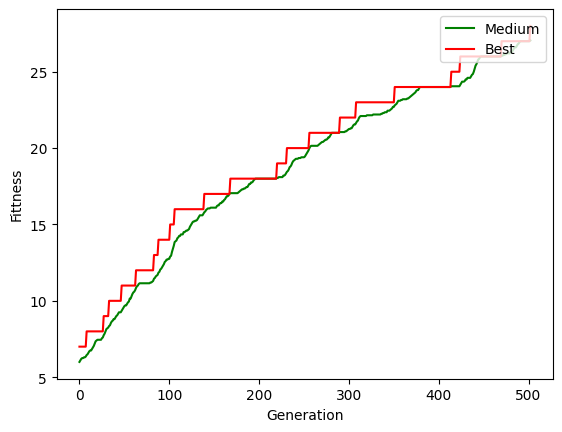

In [424]:

population = init_population()

best = run_gen_alg(population)


## Resultados

AAA

### Verificação de convergência

AAA

In [427]:
for i in range(30):
    population = init_population()
    best = run_gen_alg(population,
                       _print=False)


Número de gerações: 546  | Acertos: 28
Número de gerações: 669  | Acertos: 28
Número de gerações: 681  | Acertos: 28
Número de gerações: 508  | Acertos: 28
Número de gerações: 434  | Acertos: 28
Número de gerações: 649  | Acertos: 28
Número de gerações: 532  | Acertos: 28
Número de gerações: 671  | Acertos: 28
Número de gerações: 652  | Acertos: 28
Número de gerações: 827  | Acertos: 28
Número de gerações: 631  | Acertos: 28
Número de gerações: 488  | Acertos: 28
Número de gerações: 733  | Acertos: 28
Número de gerações: 667  | Acertos: 28
Número de gerações: 518  | Acertos: 28
Número de gerações: 603  | Acertos: 28
Número de gerações: 829  | Acertos: 28
Número de gerações: 772  | Acertos: 28
Número de gerações: 548  | Acertos: 28
Número de gerações: 571  | Acertos: 28
Número de gerações: 591  | Acertos: 28
Número de gerações: 580  | Acertos: 28
Número de gerações: 878  | Acertos: 28
Número de gerações: 662  | Acertos: 28
Número de gerações: 690  | Acertos: 28
Número de gerações: 549  

### Variação da Probabilidade de Mutação

Rodar umas 10 vezes


### Variação na Probablidade de Cruzamento
Rodar umas 10 vezes

## Conclusão

Com N = 20 e N = 50 as curvas, depois de 125 e 220 iterações, respectivamente, não apresentaram melhorias, provavelmente porque o programa não apresentou variabilidade suficiente e a configuração final da população é resultado de um pico evolutivo que apresentava soluções melhores no início, mas encontrou uma limitação.

Dessa forma, pôde-se notar a importância de adicionar variabilidade às populações, tanto na forma de mutações mais frequentes, quanto reduzindo a exclusão dos indivíduos menos inaptos, para que o algoritmo consiga chegar na resposta ótima e não fique preso em uma tendência evolutiva.
